In [13]:
import QuantLib as ql

# Set up dates and market data
evaluation_date = ql.Date(30, 5, 2024)
ql.Settings.instance().evaluationDate = evaluation_date

expiry_date = ql.Date(20, 9, 2024)
strike_price = 190
option_type = ql.Option.Call

spot_price = 191.62
dividend_rate = 0.0053
risk_free_rate = 0.05
volatility = 0.2361

# Set up yield curves
dividend_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(
        evaluation_date, 
        dividend_rate, 
        ql.Actual360()
    )
)
risk_free_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(
        evaluation_date, 
        risk_free_rate, 
        ql.Actual360()
    )
)

# Define Heston process parameters
v0 = volatility * volatility
kappa = 2.0
theta = volatility * volatility
sigma = 0.1
rho = 0.0

# Create Heston process and model
heston_process = ql.HestonProcess(
    risk_free_ts, 
    dividend_ts, 
    ql.QuoteHandle(
        ql.SimpleQuote(spot_price)
    ), 
    v0, 
    kappa, 
    theta, 
    sigma, 
    rho
)
heston_model = ql.HestonModel(heston_process)

In [14]:
# Define option payoff and exercise
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.AmericanExercise(evaluation_date, expiry_date)
american_option = ql.VanillaOption(payoff, exercise)

heston_fd_engine = ql.FdHestonVanillaEngine(heston_model)
american_option.setPricingEngine(heston_fd_engine)

# Set up pricing engine and calculate option price
option_price = american_option.NPV()
print(f"Option Price: {option_price:.2f}")

# Function to price the option
def price_option(strike_price, expiry_date, volatility):
    # Set up dates and market data
    evaluation_date = ql.Date(30, 5, 2024)
    ql.Settings.instance().evaluationDate = evaluation_date
    spot_price = 191.62
    dividend_rate = 0.0053
    risk_free_rate = 0.05

    # Set up yield curves
    dividend_ts = ql.YieldTermStructureHandle(
        ql.FlatForward(evaluation_date, dividend_rate, ql.Actual360())
    )
    risk_free_ts = ql.YieldTermStructureHandle(
        ql.FlatForward(evaluation_date, risk_free_rate, ql.Actual360())
    )

    # Define Heston process parameters
    v0 = volatility * volatility
    kappa = 2.0
    theta = volatility * volatility
    sigma = 0.1
    rho = 0.0

    # Create Heston process and model
    heston_process = ql.HestonProcess(
        risk_free_ts, dividend_ts, ql.QuoteHandle(ql.SimpleQuote(spot_price)),
        v0, kappa, theta, sigma, rho
    )
    heston_model = ql.HestonModel(heston_process)

    # Define option payoff and exercise
    option_type = ql.Option.Call
    payoff = ql.PlainVanillaPayoff(option_type, strike_price)
    exercise = ql.AmericanExercise(evaluation_date, expiry_date)
    american_option = ql.VanillaOption(payoff, exercise)

    # Set up pricing engine and calculate option price
    heston_fd_engine = ql.FdHestonVanillaEngine(heston_model)
    american_option.setPricingEngine(heston_fd_engine)
    option_price = american_option.NPV()
    return option_price

# Original parameters
original_strike_price = 190
original_expiry_date = ql.Date(20, 9, 2024)
original_volatility = 0.2361

# Price with original parameters
original_price = price_option(original_strike_price, original_expiry_date, original_volatility)
print(f"Original Option Price: {original_price:.2f}")

# Modify Strike Price
new_strike_price = 200
new_price_strike = price_option(new_strike_price, original_expiry_date, original_volatility)
print(f"Option Price with new Strike Price (200): {new_price_strike:.2f}")

# Modify Expiry Date
new_expiry_date = ql.Date(20, 12, 2024)
new_price_expiry = price_option(original_strike_price, new_expiry_date, original_volatility)
print(f"Option Price with new Expiry Date (20-Dec-2024): {new_price_expiry:.2f}")

# Modify Volatility
new_volatility = 0.3
new_price_volatility = price_option(original_strike_price, original_expiry_date, new_volatility)
print(f"Option Price with new Volatility (0.3): {new_price_volatility:.2f}")


Option Price: 12.24
Original Option Price: 12.24
Option Price with new Strike Price (200): 7.67
Option Price with new Expiry Date (20-Dec-2024): 16.70
Option Price with new Volatility (0.3): 14.91


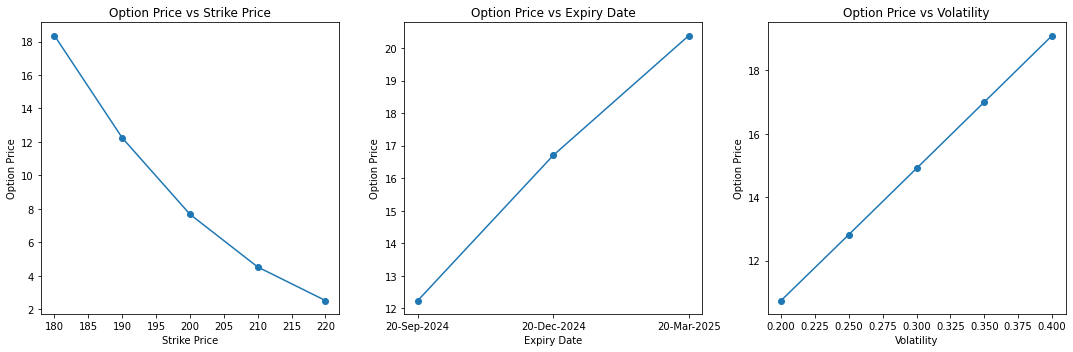

In [15]:
import matplotlib.pyplot as plt

# Lists to store results
strike_prices = [180, 190, 200, 210, 220]
expiry_dates = [ql.Date(20, 9, 2024), ql.Date(20, 12, 2024), ql.Date(20, 3, 2025)]
volatilities = [0.2, 0.25, 0.3, 0.35, 0.4]

strike_prices_results = []
expiry_dates_results = []
volatilities_results = []

# Calculate option prices for different strike prices
for sp in strike_prices:
    price = price_option(sp, original_expiry_date, original_volatility)
    strike_prices_results.append(price)

# Calculate option prices for different expiry dates
for ed in expiry_dates:
    price = price_option(original_strike_price, ed, original_volatility)
    expiry_dates_results.append(price)

# Calculate option prices for different volatilities
for vol in volatilities:
    price = price_option(original_strike_price, original_expiry_date, vol)
    volatilities_results.append(price)

# Plot results
plt.figure(figsize=(15, 5))

# Plot for strike prices
plt.subplot(1, 3, 1)
plt.plot(strike_prices, strike_prices_results, marker='o')
plt.title('Option Price vs Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')

# Plot for expiry dates
expiry_dates_labels = ['20-Sep-2024', '20-Dec-2024', '20-Mar-2025']
plt.subplot(1, 3, 2)
plt.plot(expiry_dates_labels, expiry_dates_results, marker='o')
plt.title('Option Price vs Expiry Date')
plt.xlabel('Expiry Date')
plt.ylabel('Option Price')

# Plot for volatilities
plt.subplot(1, 3, 3)
plt.plot(volatilities, volatilities_results, marker='o')
plt.title('Option Price vs Volatility')
plt.xlabel('Volatility')
plt.ylabel('Option Price')

plt.tight_layout()
plt.show()
